<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Classifier-1:-Control-vs.-sPTD" data-toc-modified-id="Classifier-1:-Control-vs.-sPTD-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classifier 1: Control vs. sPTD</a></span><ul class="toc-item"><li><span><a href="#Saving-Feature-Selected-Data" data-toc-modified-id="Saving-Feature-Selected-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Saving Feature Selected Data</a></span></li></ul></li><li><span><a href="#Classifier-2:-Control-vs.-PPROM" data-toc-modified-id="Classifier-2:-Control-vs.-PPROM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classifier 2: Control vs. PPROM</a></span><ul class="toc-item"><li><span><a href="#Saving-Feature-Selected-Data" data-toc-modified-id="Saving-Feature-Selected-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Saving Feature Selected Data</a></span></li></ul></li></ul></div>

# Goal

The goal of this notebook is to select 100 unique genes (i.e. features) for classification. I will personally use highly variable gene selection using the `scanpy` package. If you wish to run the notebook, you will likely need to `pip install` the `scanpy` package and likely the `anndata` package as well (unless I have the directions to set up conda environment to take care of this, which likely I will forget to do). 

**Question**: Can I select two different sets of 100 unique genes for Classifier 1 (Control vs. sPTD) and Classifier 2 (Control vs. PPROM)? I will assume so in this notebook, but maybe someone needs to check the rules again.

**Resources**: 
1. Scanpy's Clustering 3K PBMC tutorial (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
2. AnnData API: https://icb-anndata.readthedocs-hosted.com/en/stable/anndata.AnnData.html

In [24]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import torch

sc.settings.verbosity = 3            
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.6.21 umap==0.3.9 numpy==1.16.4 scipy==1.2.1 pandas==0.25.0 scikit-learn==0.21.2 statsmodels==0.10.0 


# Classifier 1: Control vs. sPTD

In [3]:
X = pd.read_csv("../data/processed/clf_1/X_train.csv", index_col = 0)
print(X.shape)
X.head()

(340, 29459)


,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9987_at,9988_at,9989_at,999_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at
GSM1437802,5.673714,3.722012,6.844537,4.209495,6.915998,4.460464,6.375718,6.892112,4.310852,2.467458,...,9.460553,8.828996,8.869525,5.205051,9.939056,9.981687,3.461509,8.927501,7.001237,7.333485
GSM1437801,5.657469,3.027650,6.979622,3.973889,6.820816,3.616890,6.338360,6.773238,4.657736,2.684089,...,8.849483,8.333915,9.052965,6.010992,9.991151,10.237839,3.016677,8.816772,6.679151,7.473224
GSM1437804,5.263798,3.095365,7.311993,4.126598,6.785624,3.937075,6.261533,6.876197,4.446078,2.822903,...,9.307390,8.385302,8.787503,5.503401,9.865705,10.098885,3.213477,8.728658,6.770355,6.917774
GSM1437803,5.621857,3.429769,7.406321,3.721685,6.665341,3.490133,6.316306,6.744602,4.695354,2.579157,...,9.324867,8.510463,8.665411,5.320511,9.816262,10.116891,3.500357,8.630333,6.660580,7.043207
GSM1437806,5.746427,2.938438,7.155013,3.899342,6.637787,3.725999,6.217101,6.821987,4.483252,2.331567,...,8.783982,8.263779,8.517233,6.345005,9.795215,10.076414,4.018665,8.810124,6.498137,7.422586


In [15]:
# Scanpy processes AnnData object, so construct one
adata = anndata.read_csv(filename = "../data/processed/clf_1/X_train.csv")
adata

AnnData object with n_obs × n_vars = 340 × 29459 

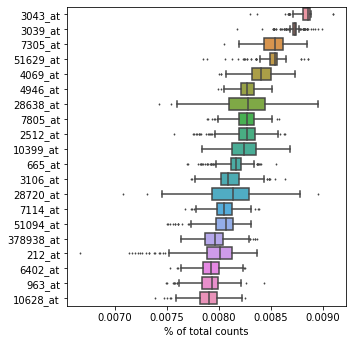

In [19]:
# There are many cool figures that can be easily generated for report. 
# Below are genes that have the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top = 20)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


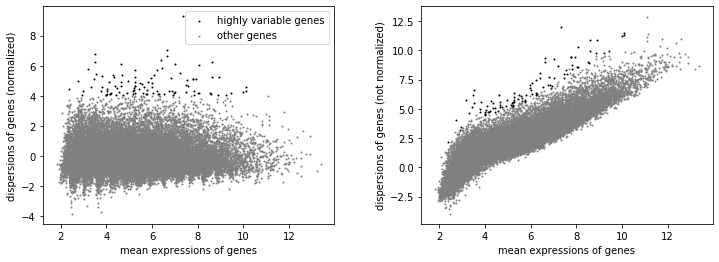

In [20]:
# Highly variable gene selection
sc.pp.highly_variable_genes(adata, n_top_genes = 100)
sc.pl.highly_variable_genes(adata)

**Note**: Black dots indiate genes that we are keeping.

In [22]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 340 × 100 
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

## Saving Feature Selected Data

I will save the `AnnData` object into `../data/feature_selected/clf_1/X.h5ad`, and `torch.Tensor` into `../data/torch/clf_1/X_train_100genes.pt`.

I will also save the list of highly variable genes, since it will be needed to subset the `X_test` for inference.

In [23]:
adata.write("../data/feature_selected/clf_1/X.h5ad")

In [27]:
X_np = np.float32(adata.X)
X = torch.from_numpy(X_np)
torch.save(X, "../data/torch/clf_1/X_train_100genes.pt")

In [31]:
selected_genes = pd.DataFrame(adata.var.index)
selected_genes.to_csv("../data/feature_selected/clf_1/selected_genes.csv")

# Classifier 2: Control vs. PPROM

Simply repeat above for Classifier 2.

In [32]:
X = pd.read_csv("../data/processed/clf_2/X_train.csv", index_col = 0)
print(X.shape)
X.head()

(380, 29459)


,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9987_at,9988_at,9989_at,999_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at
GSM1437802,5.673714,3.722012,6.844537,4.209495,6.915998,4.460464,6.375718,6.892112,4.310852,2.467458,...,9.460553,8.828996,8.869525,5.205051,9.939056,9.981687,3.461509,8.927501,7.001237,7.333485
GSM1437801,5.657469,3.027650,6.979622,3.973889,6.820816,3.616890,6.338360,6.773238,4.657736,2.684089,...,8.849483,8.333915,9.052965,6.010992,9.991151,10.237839,3.016677,8.816772,6.679151,7.473224
GSM1437804,5.263798,3.095365,7.311993,4.126598,6.785624,3.937075,6.261533,6.876197,4.446078,2.822903,...,9.307390,8.385302,8.787503,5.503401,9.865705,10.098885,3.213477,8.728658,6.770355,6.917774
GSM1437803,5.621857,3.429769,7.406321,3.721685,6.665341,3.490133,6.316306,6.744602,4.695354,2.579157,...,9.324867,8.510463,8.665411,5.320511,9.816262,10.116891,3.500357,8.630333,6.660580,7.043207
GSM1437806,5.746427,2.938438,7.155013,3.899342,6.637787,3.725999,6.217101,6.821987,4.483252,2.331567,...,8.783982,8.263779,8.517233,6.345005,9.795215,10.076414,4.018665,8.810124,6.498137,7.422586


In [33]:
# Scanpy processes AnnData object, so construct one
adata = anndata.read_csv(filename = "../data/processed/clf_2/X_train.csv")
adata

AnnData object with n_obs × n_vars = 380 × 29459 

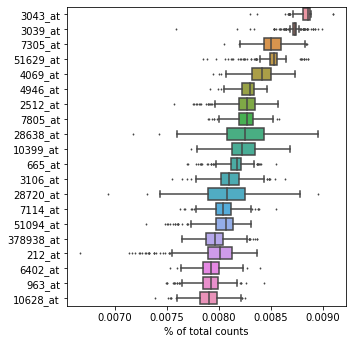

In [34]:
# There are many cool figures that can be easily generated for report. 
# Below are genes that have the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top = 20)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


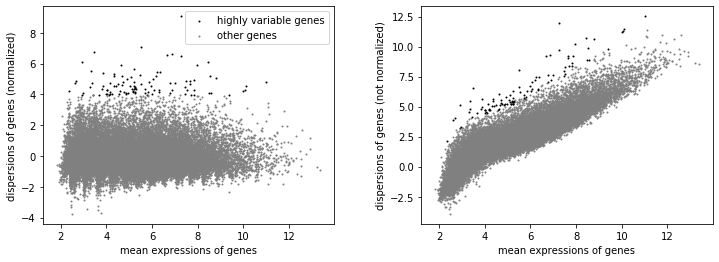

In [35]:
# Highly variable gene selection
sc.pp.highly_variable_genes(adata, n_top_genes = 100)
sc.pl.highly_variable_genes(adata)

In [36]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 380 × 100 
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

## Saving Feature Selected Data

I will save the `AnnData` object into `../data/feature_selected/clf_2/X.h5ad`, and `torch.Tensor` into `../data/torch/clf_2/X_train_100genes.pt`.

I will also save the list of highly variable genes, since it will be needed to subset the `X_test` for inference.

In [37]:
adata.write("../data/feature_selected/clf_2/X.h5ad")

In [38]:
X_np = np.float32(adata.X)
X = torch.from_numpy(X_np)
torch.save(X, "../data/torch/clf_2/X_train_100genes.pt")

In [39]:
selected_genes = pd.DataFrame(adata.var.index)
selected_genes.to_csv("../data/feature_selected/clf_2/selected_genes.csv")